In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# 数据集引入
df = pd.read_csv('J:/csv/usa_flights.csv')

In [4]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


### 1. 选取航班延误top10

In [7]:
df.sort_values('arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0,0,190,1444.0,0.0,0.0,0.0,0.0,59.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0,0,583,1392.0,0.0,0.0,0.0,0.0,117.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0,0,432,1380.0,0.0,0.0,4.0,0.0,104.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0,0,583,1222.0,0.0,15.0,0.0,0.0,102.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0,0,721,1019.0,0.0,168.0,0.0,0.0,127.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0,0,1501,1174.0,0.0,0.0,0.0,0.0,231.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0,0,749,1112.0,0.0,0.0,26.0,0.0,171.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0,0,1532,1070.0,0.0,0.0,14.0,0.0,240.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0,0,236,1033.0,0.0,9.0,0.0,0.0,66.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0,0,1184,1016.0,0.0,0.0,0.0,0.0,193.0


### 2. 计算航班延误比例

In [16]:
# 2.1 开辟新列存储延误情况，参照标准为arr_delay的正负
# apply 进行数据预处理，若arr_delay > 0 为延误，反之不延误
df['delayed'] = df['arr_delay'].apply(lambda x: x > 0)

In [21]:
# 2.2 查看开辟新列的数据项分布情况
delayed = df['delayed'].value_counts()

In [22]:
delayed

False    103037
True      98627
Name: delayed, dtype: int64

In [41]:
# 2.3 计算延误比例
res = delayed[1] / (delayed[0] + delayed[1])

In [43]:
print('%.2f%%' % (res * 100))

48.91%


### 3. 计算每个航空公司的航班延误情况

In [48]:
# 3.1 按照航空公司、延误情况进行分组
g = df.groupby(['unique_carrier', 'delay'])

In [58]:
# 3.2 查看分组详情 这个方法很好用，要记住
# 多级的Series
g.size()

unique_carrier  delay
AA              False     8912
                True      9841
AS              False     3527
                True      2104
B6              False     4832
                True      4401
DL              False    17719
                True      9803
EV              False    10596
                True     11371
F9              False     1103
                True      1848
HA              False     1351
                True      1354
MQ              False     4692
                True      8060
NK              False     1550
                True      2133
OO              False     9977
                True     10804
UA              False     7885
                True      8624
US              False     7850
                True      6353
VX              False     1254
                True       781
WN              False    21789
                True     21150
dtype: int64

In [60]:
# 3.3 多级Series 转换为 DataFrame
resdf = g.size().unstack()

In [61]:
resdf

delay,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [62]:
import matplotlib.pyplot as plt

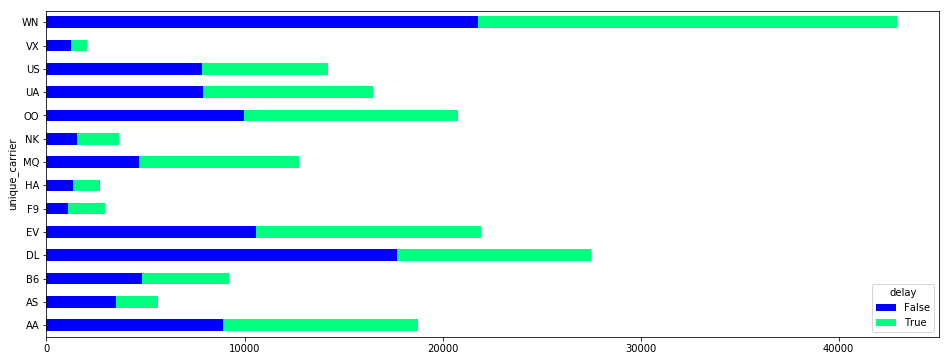

In [68]:
# 3.4 画图得出各公司航班延误情况
resdf.plot(kind = 'barh', stacked = True, figsize = [16, 6], colormap = 'winter')

### 4.透视表小应用

In [76]:
# index：以航班飞行时间作为索引
# columns：参照列为各大航空公司
# values：所关心的参数，关联聚合方法aggfunc
### columns values 区别：
### columns 是可选的，提供多个列对所关心的参数进行分割，如下例子延误情况被分割成了：各个公司的延误情况
# aggfunc：与参数values关联，是values参数的数据聚合方式
# margins：添加行列总和数据
df.pivot_table(
    index = 'flight_date',
    columns = 'unique_carrier',
    values = 'delayed',
    aggfunc = ['count'],
    margins = True
)

count                                                     \
unique_carrier      AA    AS    B6     DL     EV    F9    HA     MQ    NK   
flight_date                                                                 
02/01/2015 0:00   1545   477   759   2271   1824   254   224   1046   287   
03/01/2015 0:00   1453   449   711   2031   1744   192   202    937   285   
04/01/2015 0:00   1534   458   759   2258   1833   249   206   1027   284   
05/01/2015 0:00   1532   433   754   2212   1811   264   209   1039   288   
06/01/2015 0:00   1400   415   692   2054   1686   249   202    966   279   
07/01/2015 0:00   1420   419   694   2107   1705   228   208    998   284   
08/01/2015 0:00   1447   444   731   2214   1759   224   208   1009   284   
09/01/2015 0:00   1448   447   730   2204   1767   229   222   1010   289   
10/01/2015 0:00   1285   412   641   1584   1133   168   201    768   285   
11/01/2015 0:00   1426   432   711   2082   1585   222   206    979   286   
12/01/2015 0:00   1445   426   718   2280   1754   236   209   1003   281   
13/01/2015 0:00   1404   407   666   2079   1678   210   202    972   272   
14/01/2015 0:00   1414   412   667   2146   1688   226   206    998   279   
All              18753  5631  9233  27522  21967  2951  2705  12752  3683   

                                                           
unique_carrier      OO     UA     US    VX     WN     All  
flight_date                                                
02/01/2015 0:00   1763   1420   1177   176   3518   16741  
03/01/2015 0:00   1681   1233   1028   160   3328   15434  
04/01/2015 0:00   1731   1283   1158   169   3403   16352  
05/01/2015 0:00   1737   1432   1157   174   3506   16548  
06/01/2015 0:00   1527   1294   1003   152   3396   15315  
07/01/2015 0:00   1557   1259   1143   151   3398   15571  
08/01/2015 0:00   1625   1331   1171   164   3398   16009  
09/01/2015 0:00   1631   1331   1169   167   3364   16008  
10/01/2015 0:00   1270    908    912   109   2668   12344  
11/01/2015 0:00   1558   1162   1061   156   2888   14754  
12/01/2015 0:00   1628   1337   1086   161   3324   15888  
13/01/2015 0:00   1514   1261    996   145   3374   15180  
14/01/2015 0:00   1559   1258   1142   151   3374   15520  
All              20781  16509  14203  2035  42939  201664